# **Exploratory Data Analysis**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.stats import zscore

In [2]:
# Read CSV file
df = pd.read_csv('../data/processed/cleaned_online_retail.csv')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522480 entries, 0 to 522479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    522480 non-null  int64  
 1   StockCode    522480 non-null  object 
 2   Description  522480 non-null  object 
 3   Quantity     522480 non-null  int64  
 4   InvoiceDate  522480 non-null  object 
 5   UnitPrice    522480 non-null  float64
 6   CustomerID   391093 non-null  float64
 7   Country      522480 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.9+ MB


In [4]:
# Change InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
# Make CsstomerID as an object
df['CustomerID'] = df['CustomerID'].astype(str).str.replace('.0', '', regex=False)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522480 entries, 0 to 522479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    522480 non-null  int64         
 1   StockCode    522480 non-null  object        
 2   Description  522480 non-null  object        
 3   Quantity     522480 non-null  int64         
 4   InvoiceDate  522480 non-null  datetime64[ns]
 5   UnitPrice    522480 non-null  float64       
 6   CustomerID   522480 non-null  object        
 7   Country      522480 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 31.9+ MB


# **Checking Outliers**


##### **Checking Outlier : UnitPrice**

In [7]:
# Generate summary statistics for the 'UnitPrice' column
df['UnitPrice'].describe()

count    522480.000000
mean          3.273892
std           4.393241
min           0.040000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: UnitPrice, dtype: float64

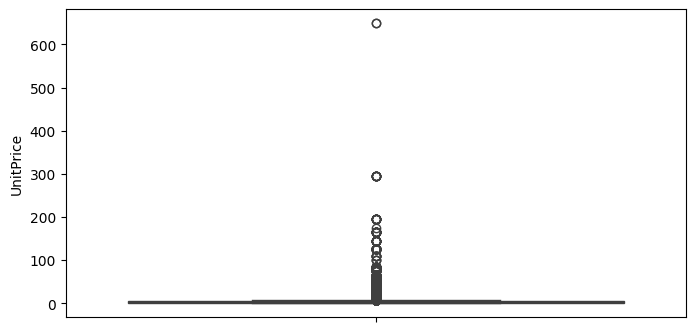

In [8]:
#Checking for OutLiers : UnitPrice using boxplot
plt.figure(figsize=(8,4))
sns.boxplot(y = df['UnitPrice'])
plt.show()

In [9]:
df.loc[df['UnitPrice'] >= 600].value_counts()
       

InvoiceNo  StockCode  Description                     Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
556444     22502      PICNIC BASKET WICKER 60 PIECES  60        2011-06-10 15:28:00  649.5      15098       United Kingdom    1
556446     22502      PICNIC BASKET WICKER 60 PIECES  1         2011-06-10 15:33:00  649.5      15098       United Kingdom    1
Name: count, dtype: int64

The boxplot highlights **UnitPrice ≥ 600** as statistical outliers, but further investigation confirms they are **valid transactions**. The product *"PICNIC BASKET WICKER 60 PIECES"* (StockCode: 22502) appears twice with a **consistent price of 649.5**, indicating it is not a data entry error. The time difference between transactions (5 minutes) supports that these were legitimate sales. Since these are valid data points, no modifications are needed. However, their impact on summary statistics should be considered when analyzing pricing patterns.


##### **Checking Outlier : Quantity**

In [10]:
# Generate summary statistics for the 'Quantity' column
df['Quantity'].describe()

count    522480.000000
mean         10.643267
std         156.603097
min           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

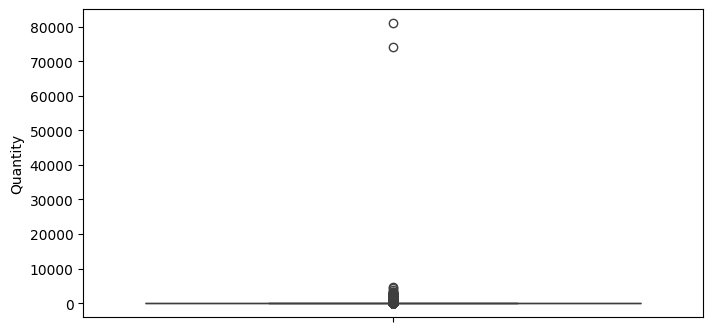

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(y = df['Quantity'])
plt.show()

In [12]:
df[df['Quantity']>= 70000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
59407,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
521013,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [13]:
df = df[df['Quantity']< 70000]

The boxplot highlights **Quantity ≥ 70,000** as extreme values. Upon inspection, two transactions exceed this threshold:  
- **74215 units** of *"MEDIUM CERAMIC TOP STORAGE JAR"*,  
- **80995 units** of *"PAPER CRAFT, LITTLE BIRDIE"*.  

These values likely represent bulk purchases that significantly skew the distribution. To ensure meaningful analysis, these two records will be removed from the dataset, allowing for a more representative understanding of typical order quantities.


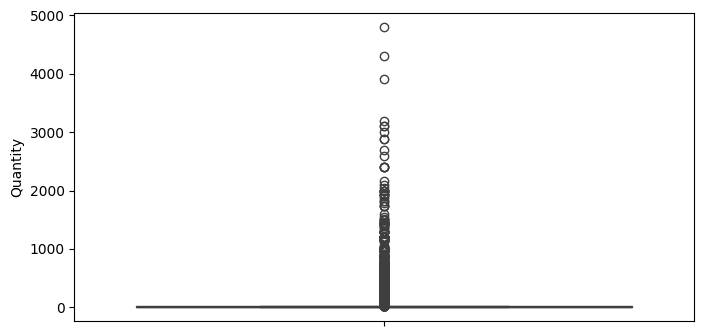

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(y = df['Quantity'])
plt.show()

In [15]:
df[df['Quantity']> 4000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
198423,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom
406236,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom


In [16]:
Q1 = df['Quantity'].quantile(0.25)  
Q3 = df['Quantity'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
valid_transactions = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of Outlier Transactions: {outliers.shape[0]}")
print(f"Number of Valid Transactions: {valid_transactions.shape[0]}")


Q1: 1.0, Q3: 12.0, IQR: 11.0
Lower Bound: -15.5, Upper Bound: 28.5
Number of Outlier Transactions: 26813
Number of Valid Transactions: 495665


In [17]:
df['z_score'] = zscore(df['Quantity'])  
df_outliers = df[df['z_score'].abs() > 3]  
print(f"Number of Outliers with Z-score > 3: {df_outliers.shape[0]}")  

Number of Outliers with Z-score > 3: 4008


**Validity of Large Quantity Transactions** <br>
<br>
Transactions with Quantity > 4000 are statistical outliers but valid business transactions. The dataset includes 4,300 units of SMALL POPCORN HOLDER and 4,800 units of WORLD WAR 2 GLIDERS ASSTD DESIGNS, both from the UK. Given their low unit prices (£0.72 and £0.21), these are likely bulk purchases by resellers or event organizers, common in B2B transactions.  

**Outlier Analysis (IQR & Z-score)**  
- **IQR Method:** Outliers (**26,813**), Valid Transactions (**495,665**)  
- **Z-score > 3:** Outliers (**4,008**)  

**Key Insight**  
Statistical outliers aren’t always errors. Many bulk transactions exceed 28.5 units but are legitimate sales, emphasizing the importance of business context over statistics rather than relying solely on numerical thresholds.  


##### **Checking Outlier : Sales**

In [18]:
# Calculate total sales for each transaction by multiplying quantity sold by unit price
df['sales'] = df['Quantity'] * df['UnitPrice']


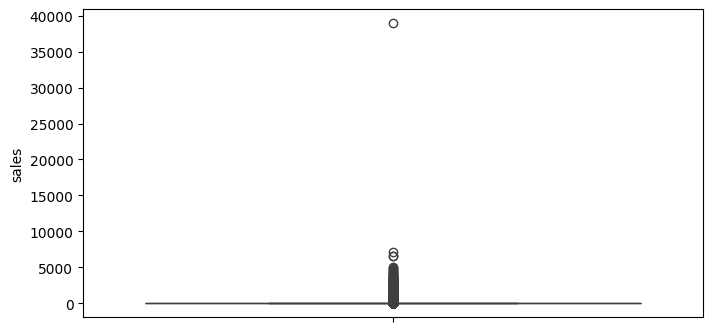

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(y = df['sales'])
plt.show()

In [20]:
df[df['sales']> 35000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,z_score,sales
214379,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098,United Kingdom,1.311646,38970.0


In [21]:
df.drop(df[df['sales'] > 35000].index, inplace=True)

Even though this transaction is **a valid sale**, its **extremely high unit price (£649.5)** makes it an anomaly compared to the rest of the dataset. Unlike other high-sales transactions driven by **large quantities**, this one stands out solely due to its **unit price**, which is significantly higher than typical values.  

Keeping it could **skew sales analysis, distort average price calculations, and misrepresent business trends**. Since the dataset primarily consists of small retail items, removing this transaction ensures a more **accurate representation of sales patterns** while maintaining the overall **business context**.


In [22]:
df_clean = df.copy()

# **Total Sales Per Mounth**


In [23]:
# Find the earliest (minimum) invoice date in the cleaned dataset
min_date = min(df_clean['InvoiceDate'])
min_date


Timestamp('2010-12-01 08:26:00')

In [24]:
# Find the latest (maximum) invoice date in the cleaned dataset
max_date = max(df_clean['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [25]:
# Extract Year-Month from InvoiceDate
df_clean["Month"] = df_clean["InvoiceDate"].dt.to_period("M")


In [26]:
# Display the first five rows of df_clean
df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,z_score,sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,-0.114810,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-0.114810,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,-0.061978,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-0.114810,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-0.114810,20.34,2010-12


In [27]:
# Mengelompokkan data berdasarkan bulan dan menghitung total penjualan (sales) per bulan
df_clean_agg = df_clean.groupby('Month')['sales'].sum().reset_index()

In [28]:
# Convert Month column to string type  
df_clean_agg['Month'] = df_clean_agg['Month'].astype('str')


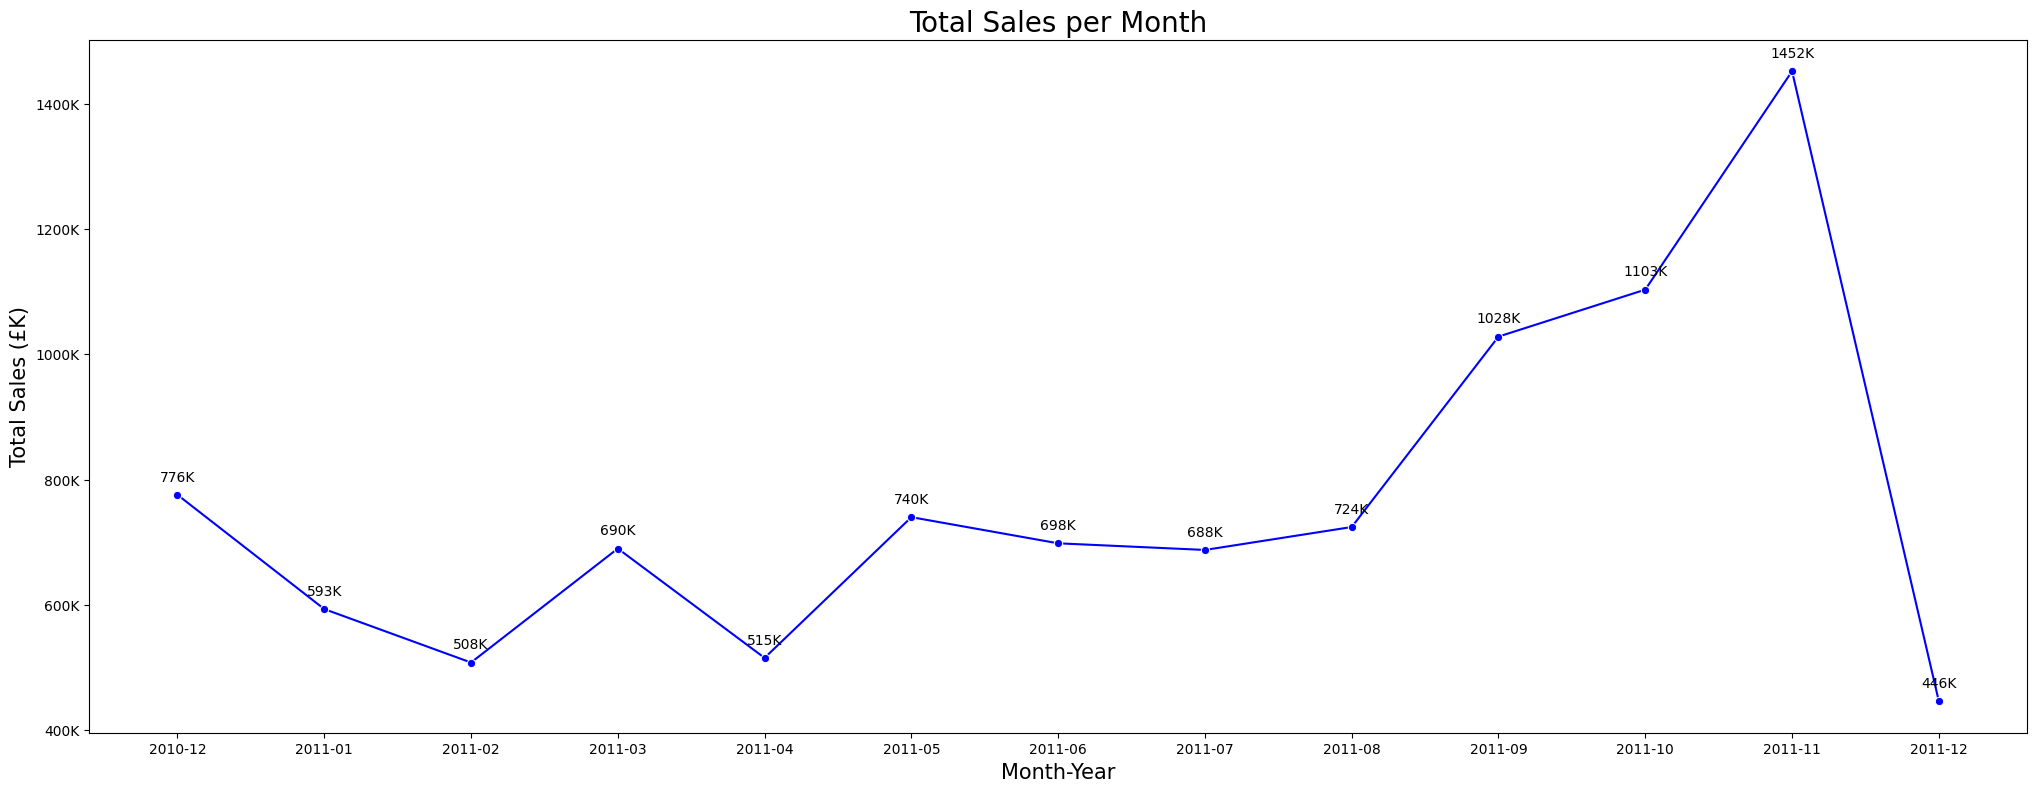

In [29]:
# Set figure size  
plt.figure(figsize=(25, 9))

# Set plot title  
plt.title('Total Sales per Month', fontsize=20)

# Set x-axis label  
plt.xlabel('Month-Year', fontsize=15)

# Set y-axis label  (£K)
plt.ylabel('Total Sales (£K)', fontsize=15)


# Assign Month column to x  
x = df_clean_agg['Month']

# Assign sales column to y  
y = df_clean_agg['sales']


# Plot line chart with markers  
sns.lineplot(x=x, y=y, marker='o', color='b')


# Add labels to each point in K (thousands)  
for x_val, y_val in zip(x, y):
    # Format as thousands (£K)
    label = "{:.0f}K".format(y_val / 1e3)  
    plt.annotate(label, (x_val, y_val), textcoords="offset points",
                 xytext=(0, 10), ha='center')


# Format y-axis in thousands (£K)  
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e3:.0f}K'))

# Show the plot  
plt.show()



# **Total Orders Per Month**


In [30]:
# Count invoices per month 
df_month_order = df_clean.groupby('Month').count()['InvoiceNo'].reset_index()

In [31]:
# Convert all columns to string type  
df_month_order = df_month_order.astype(str)

# Convert InvoiceNo column to integer  
df_month_order['InvoiceNo'] = df_month_order['InvoiceNo'].astype(int) 

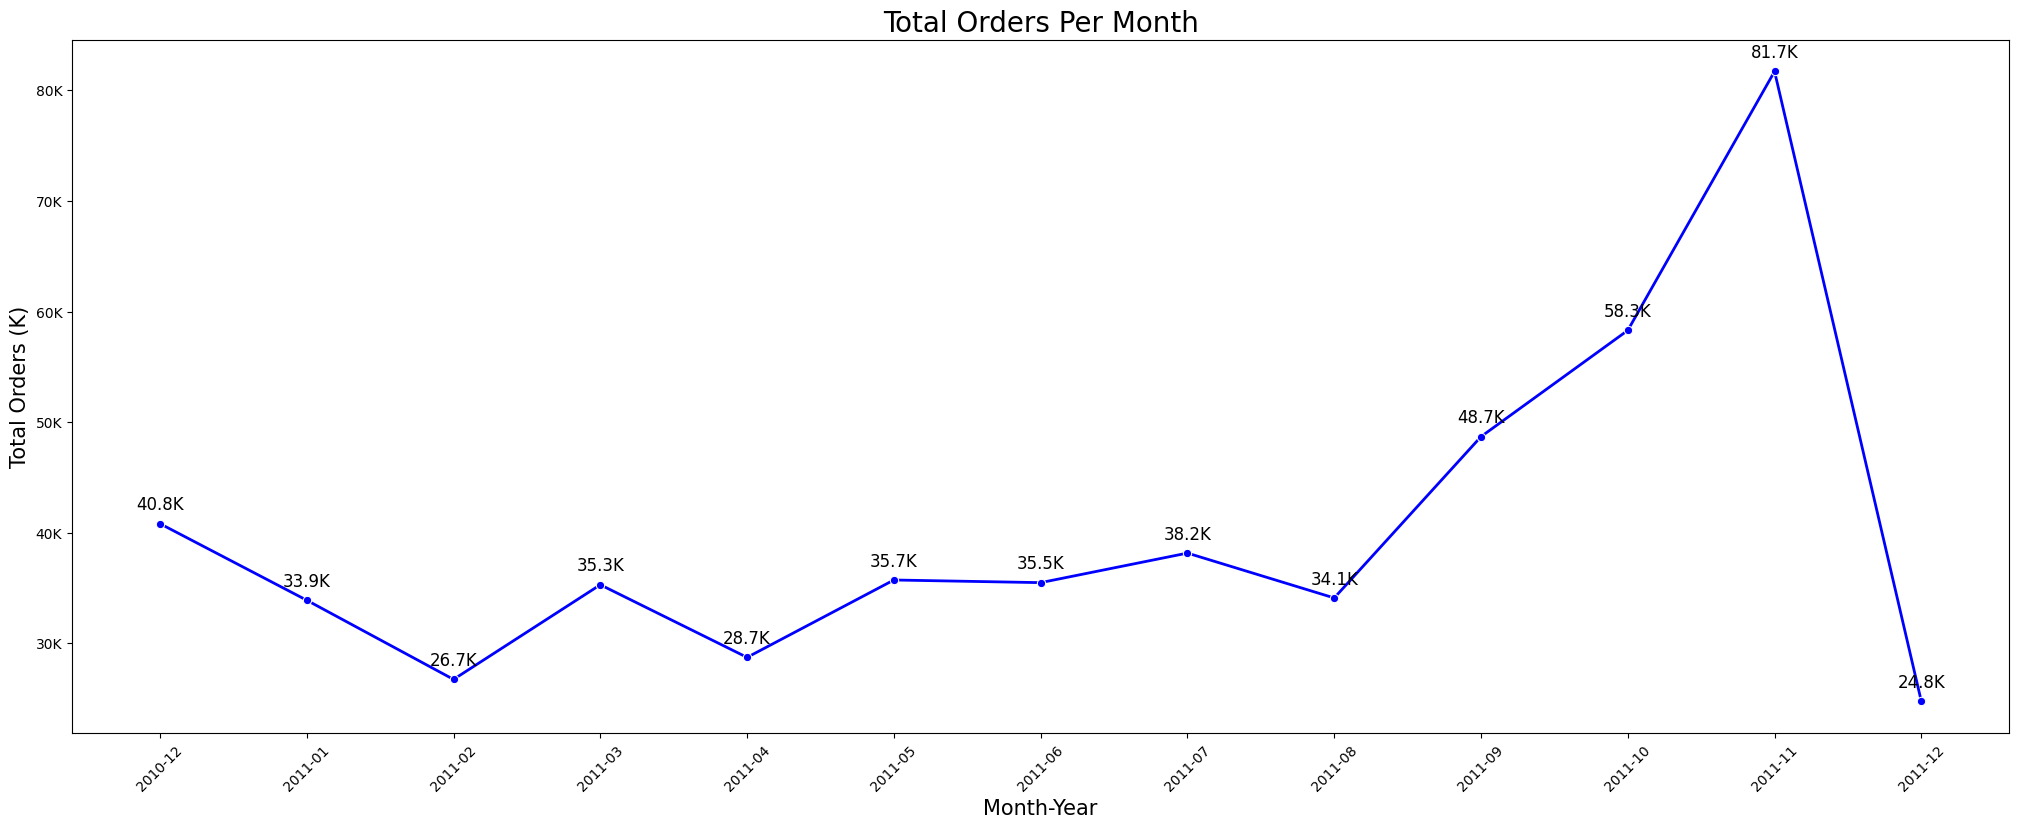

In [32]:
# Set figure size
plt.figure(figsize=(25, 9))

# Set plot title
plt.title('Total Orders Per Month', fontsize=20)

# Set x-axis label
plt.xlabel('Month-Year', fontsize=15)

# Set y-axis label
plt.ylabel('Total Orders (K)', fontsize=15)

# Assign Month column to x
x = df_month_order['Month']

# Assign total orders column to y
y = df_month_order['InvoiceNo']

# Plot line chart with markers
sns.lineplot(x=x, y=y, marker='o', color='b', linewidth=2)

# Add labels to each point in K (thousands)
for x_val, y_val in zip(x, y):
    label = "{:.1f}K".format(y_val / 1e3)  # Format as thousands (K)
    plt.annotate(label, (x_val, y_val), textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=12)

# Format y-axis in thousands (K)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e3:.0f}K'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# **Top 10 Product With Higest Total Orders**

In [33]:
# Count invoices per product description  
df_product_orders = df_clean.groupby('Description').count()['InvoiceNo'].reset_index()

# Display the dataframe  
df_product_orders

,Description,InvoiceNo
0,4 PURPLE FLOCK DINNER CANDLES,39
1,50'S CHRISTMAS GIFT BAG LARGE,129
2,DOLLY GIRL BEAKER,176
3,I LOVE LONDON MINI BACKPACK,87
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
4006,ZINC T-LIGHT HOLDER STARS SMALL,275
4007,ZINC TOP 2 DOOR WOODEN SHELF,12
4008,ZINC WILLIE WINKIE CANDLE STICK,271
4009,ZINC WIRE KITCHEN ORGANISER,16


In [34]:
# Sort products by InvoiceNo in descending order  
df_product_orders_10 = df_product_orders.sort_values(by='InvoiceNo', ascending=False)

# Display top 10 products  
df_product_orders_10.head(10)

,Description,InvoiceNo
3829,WHITE HANGING HEART T-LIGHT HOLDER,2311
1806,JUMBO BAG RED RETROSPOT,2109
2839,REGENCY CAKESTAND 3 TIER,2007
2400,PARTY BUNTING,1699
1993,LUNCH BAG RED RETROSPOT,1581
226,ASSORTED COLOUR BIRD ORNAMENT,1476
3118,SET OF 3 CAKE TINS PANTRY DESIGN,1391
2326,PACK OF 72 RETROSPOT CAKE CASES,1352
1985,LUNCH BAG BLACK SKULL.,1301
2186,NATURAL SLATE HEART CHALKBOARD,1254


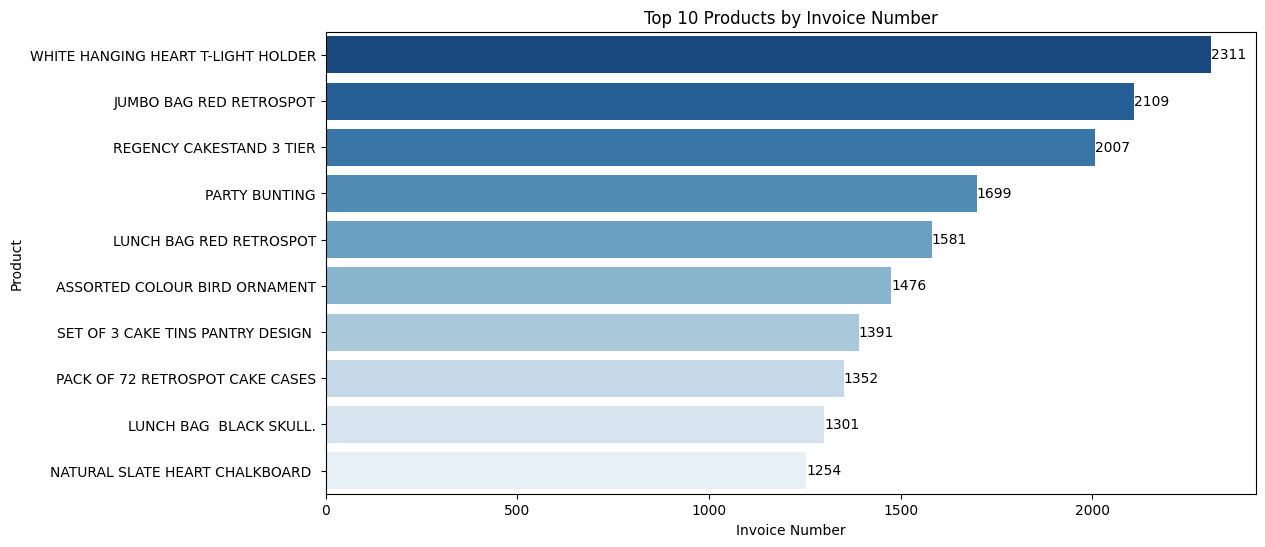

In [35]:
# Ambil 10 produk dengan InvoiceNo terbesar
top_invoice_products = df_product_orders_10.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_invoice_products['InvoiceNo'], 
    y=top_invoice_products['Description'], 
    hue=top_invoice_products['Description'],  # Agar sesuai dengan Seaborn v0.14+
    dodge=False,  
    palette='Blues_r', 
    legend=False  
)
# Tambahkan judul dan label
plt.xlabel("Invoice Number")
plt.ylabel("Product")
plt.title("Top 10 Products by Invoice Number")

# Tambahkan angka di ujung bar untuk memperjelas
for index, value in enumerate(top_invoice_products['InvoiceNo']):
    plt.text(value, index, f"{value}", va='center')

plt.show()


# **Top 10 Product With Higest Total Sales**

In [42]:
# Count sales per product description  
df_product_sales = df_clean.groupby('Description').count()['sales'].reset_index()

# Display the dataframe  
df_product_sales

,Description,sales
0,4 PURPLE FLOCK DINNER CANDLES,39
1,50'S CHRISTMAS GIFT BAG LARGE,129
2,DOLLY GIRL BEAKER,176
3,I LOVE LONDON MINI BACKPACK,87
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
4006,ZINC T-LIGHT HOLDER STARS SMALL,275
4007,ZINC TOP 2 DOOR WOODEN SHELF,12
4008,ZINC WILLIE WINKIE CANDLE STICK,271
4009,ZINC WIRE KITCHEN ORGANISER,16


In [43]:
# Sort products by sales in descending order  
df_product_sales_10 = df_product_sales.sort_values(by='sales', ascending=False)

# Display top 10 products  
df_product_sales_10.head(10)

,Description,sales
3829,WHITE HANGING HEART T-LIGHT HOLDER,2311
1806,JUMBO BAG RED RETROSPOT,2109
2839,REGENCY CAKESTAND 3 TIER,2007
2400,PARTY BUNTING,1699
1993,LUNCH BAG RED RETROSPOT,1581
226,ASSORTED COLOUR BIRD ORNAMENT,1476
3118,SET OF 3 CAKE TINS PANTRY DESIGN,1391
2326,PACK OF 72 RETROSPOT CAKE CASES,1352
1985,LUNCH BAG BLACK SKULL.,1301
2186,NATURAL SLATE HEART CHALKBOARD,1254


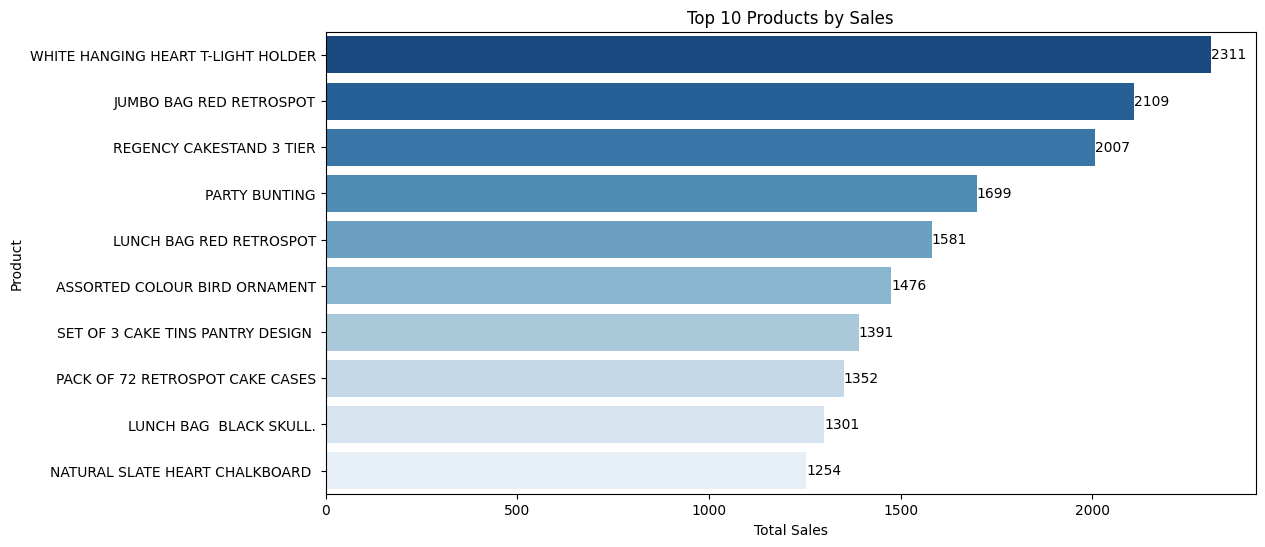

In [44]:
# Select top 10 products with highest sales  
top_products = df_product_sales_10.head(10)

# Set figure size  
plt.figure(figsize=(12, 6))

# Create bar chart  
sns.barplot(
    x=top_products['sales'], 
    y=top_products['Description'], 
    hue=top_products['Description'],  # Ensure colors are distinct  
    dodge=False,  # Prevent unnecessary separation  
    palette='Blues_r', 
    legend=False  # Disable legend to avoid duplicate labels  
)

# Add title and labels  
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.title("Top 10 Products by Sales")

# Add sales numbers at the end of each bar  
for index, value in enumerate(top_products['sales']):
    plt.text(value, index, f"{value}", va='center')

# Show the plot  
plt.show()